# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the data**

In [2]:
# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## 1. **Basic Data Exploration**

In [4]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  148654
Number of columns:  13


In [5]:
print("Data Types of each column:")
print(df.dtypes)

Data Types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [6]:
print("Missing values in each column: ")
print(df.isnull().sum())

Missing values in each column: 
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


## 2. **Descriptive Statistics**

In [7]:
# List of salary-related columns
salary_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

# Loop through each salary-related column
for salary_column in salary_columns:
    salary_stats = df[salary_column].describe()
    
    # Calculate mode separately since it's not included in describe()
    salary_mode = df[salary_column].mode()
    
    # Calculate range, standard deviation
    salary_range = df[salary_column].max() - df[salary_column].min()
    
    # Display the results
    print("\nStatistics for {}: ".format(salary_column))
    print("Mean: {}".format(salary_stats['mean']))
    print("Median: {}".format(salary_stats['50%']))
    print("Mode: {}".format(salary_mode.iloc[0]))
    print("Minimum: {}".format(salary_stats['min']))
    print("Maximum: {}".format(salary_stats['max']))
    print("Range: {}".format(salary_range))
    print("Standard deviation: {}".format(salary_stats['std']))
    print("------------------------------")


Statistics for BasePay: 
Mean: 66325.4488404877
Median: 65007.45
Mode: 0.0
Minimum: -166.01
Maximum: 319275.01
Range: 319441.02
Standard deviation: 42764.63549525887
------------------------------

Statistics for OvertimePay: 
Mean: 5066.059886444667
Median: 0.0
Mode: 0.0
Minimum: -0.01
Maximum: 245131.88
Range: 245131.89
Standard deviation: 11454.380558670258
------------------------------

Statistics for OtherPay: 
Mean: 3648.767296804575
Median: 811.27
Mode: 0.0
Minimum: -7058.59
Maximum: 400184.25
Range: 407242.84
Standard deviation: 8056.601865587466
------------------------------

Statistics for Benefits: 
Mean: 25007.893150829852
Median: 28628.62
Mode: 0.0
Minimum: -33.89
Maximum: 96570.66
Range: 96604.55
Standard deviation: 15402.215857867079
------------------------------

Statistics for TotalPay: 
Mean: 74768.32197169267
Median: 71426.60999999999
Mode: 0.0
Minimum: -618.13
Maximum: 567595.43
Range: 568213.56
Standard deviation: 50517.00527394987
-----------------------------

## 3. **Data Cleaning**

### BasePay, OvertimePay, OtherPay:

These columns are of type float and have a small number of missing values.
We can consider imputing the missing values with the mean or median of each column since they are numeric.

In [8]:
# Impute missing values with mean for BasePay, OvertimePay, OtherPay
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)

### Benefits:

The `Benefits` column has a significant number of missing values (36163).
Depending on the nature of the data, since there are a column with `TotalPayBenefits` so we can replace the missing values with zeros.

In [9]:
# Impute missing values with zeros
df['Benefits'].fillna(0, inplace=True)

### Notes and Status:
All the values of `Notes` and `Status` columns are missing and they are of type float.
So we will drop these columns

In [10]:
# Drop 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)

In [11]:
print("Missing values in each column: ")
print(df.isnull().sum())

Missing values in each column: 
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [12]:
df.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.0,316285.74,316285.74,2011,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.0,315981.05,315981.05,2011,San Francisco
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.0,307899.46,307899.46,2011,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.0,303427.55,303427.55,2011,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.0,302377.73,302377.73,2011,San Francisco


## 4. **Basic Data Visualization**

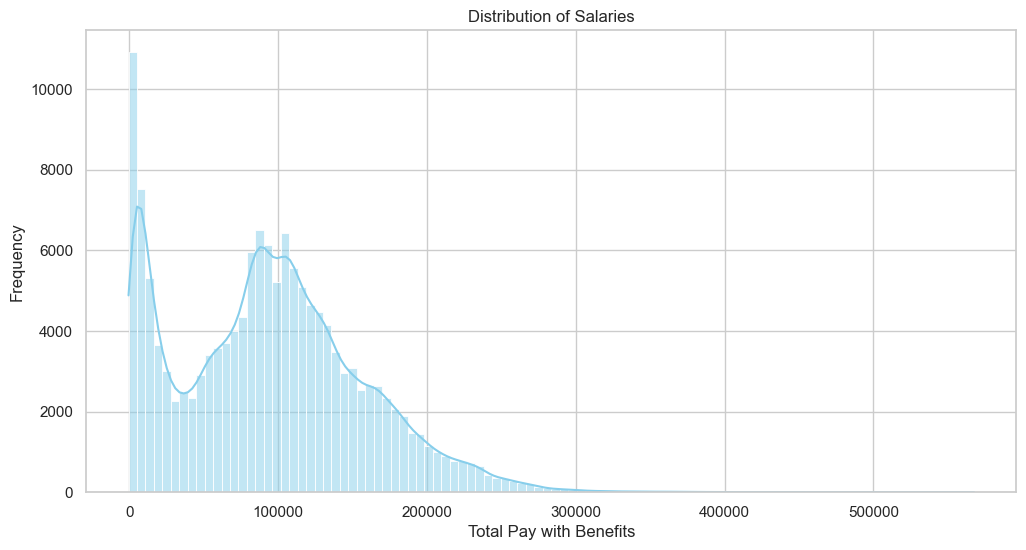

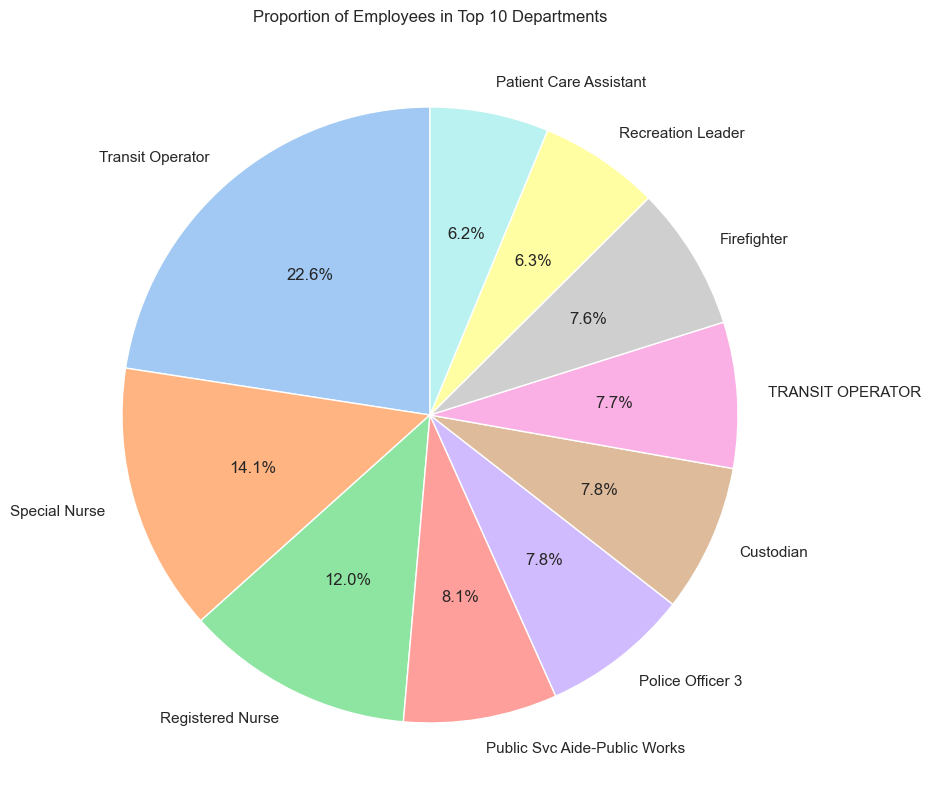

In [13]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plot histogram for the distribution of salaries
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPayBenefits'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay with Benefits')
plt.ylabel('Frequency')
plt.show()

# Plot pie chart for the proportion of employees in different departments
plt.figure(figsize=(10, 10))
department_counts = df['JobTitle'].value_counts().head(10)  # We can adjust the number of top departments
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Top 10 Departments')
plt.show()

## 5. **Grouped Analysis**

                          JobTitle  count           mean      median  \
0                    ACCOUNT CLERK     83   44035.664337   49777.820   
1                       ACCOUNTANT      5   47429.268000   60076.240   
2                ACCOUNTANT INTERN     48   29031.742917   17658.505   
3      ACPO,JuvP, Juv Prob (SFERS)      1   80266.370000   80266.370   
4                    ACUPUNCTURIST      1   67594.400000   67594.400   
5           ADMINISTRATIVE ANALYST     93   63954.867527   71602.900   
6        ADMINISTRATIVE ANALYST II      2   61497.035000   61497.035   
7       ADMINISTRATIVE ANALYST III      2   92698.515000   92698.515   
8          ADMINISTRATIVE ENGINEER     10  127961.430000  130171.065   
9  ADMINISTRATIVE SERVICES MANAGER      3   77015.580000   84783.370   

        min        max  
0    614.00   60838.20  
1   1148.40   65392.01  
2   2981.53   58799.53  
3  80266.37   80266.37  
4  67594.40   67594.40  
5   2388.24   79754.03  
6  47408.25   75585.82  
7  9255

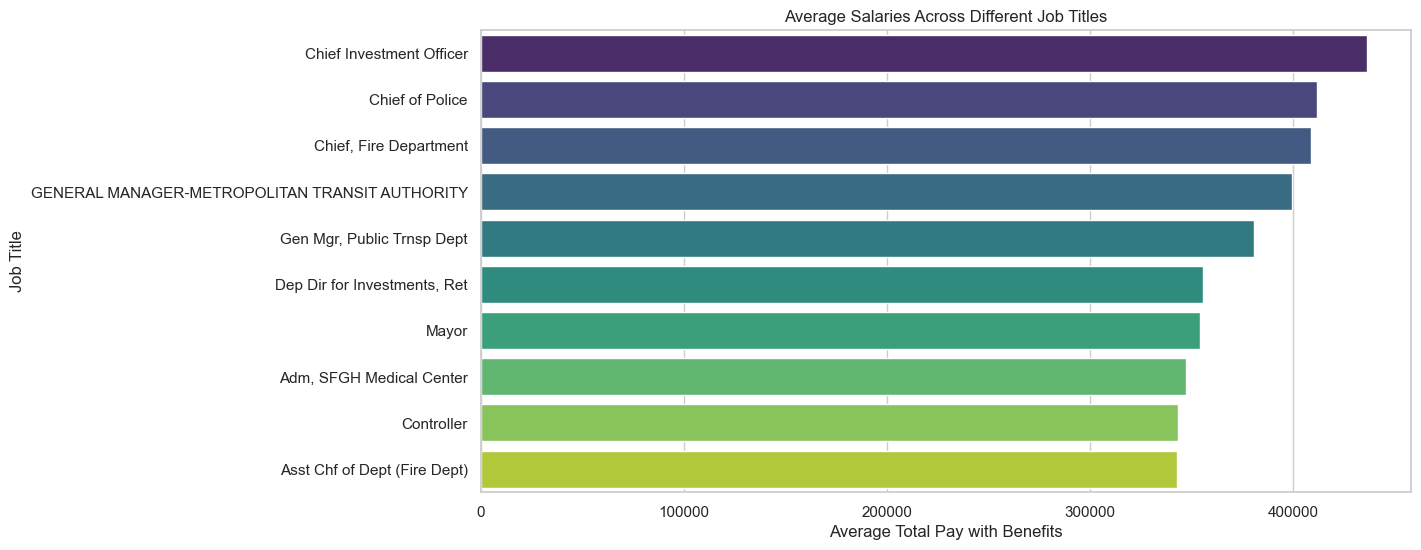

In [14]:
# Group the data by 'JobTitle' and calculate summary statistics
grouped_data = df.groupby('JobTitle')['TotalPayBenefits'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()

# Display the summary statistics for each job title
print(grouped_data.head(10))  # Displaying the first 10 rows for illustration

# Plot a bar chart to compare average salaries across different job titles
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='JobTitle', data=grouped_data.sort_values('mean', ascending=False).head(10), palette='viridis')
plt.title('Average Salaries Across Different Job Titles')
plt.xlabel('Average Total Pay with Benefits')
plt.ylabel('Job Title')
plt.show()

## 6. **Simple Correlation Analysis**

Correlation coefficient between TotalPayBenefits and BasePay: 0.9429986849707105


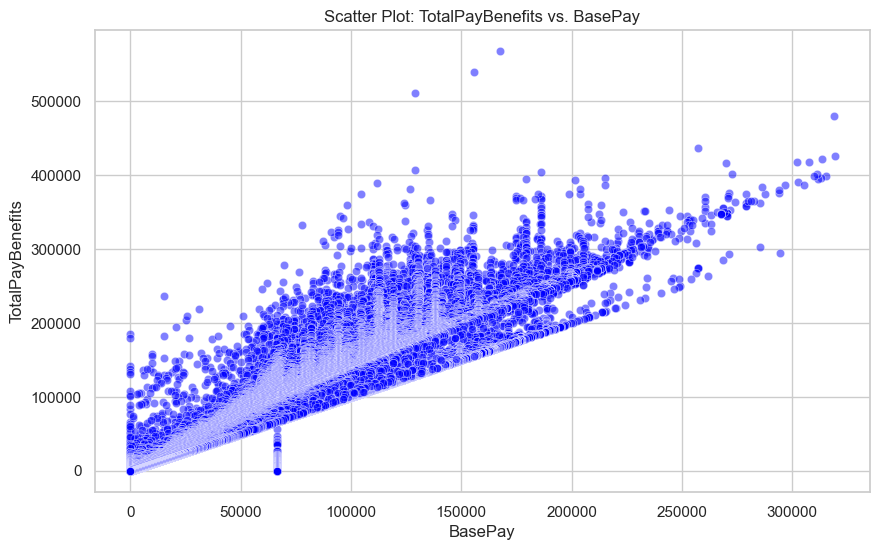

Correlation coefficient between TotalPayBenefits and OvertimePay: 0.4679673100669008


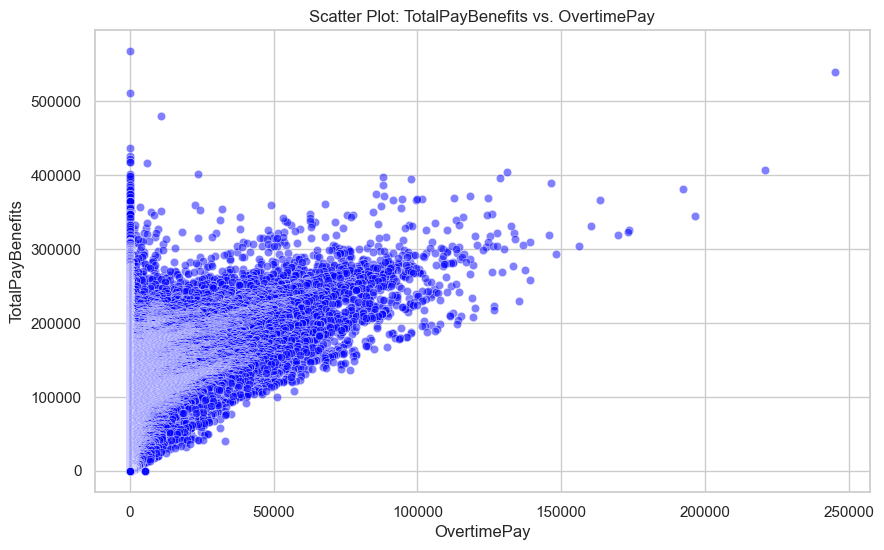

Correlation coefficient between TotalPayBenefits and OtherPay: 0.422328007777252


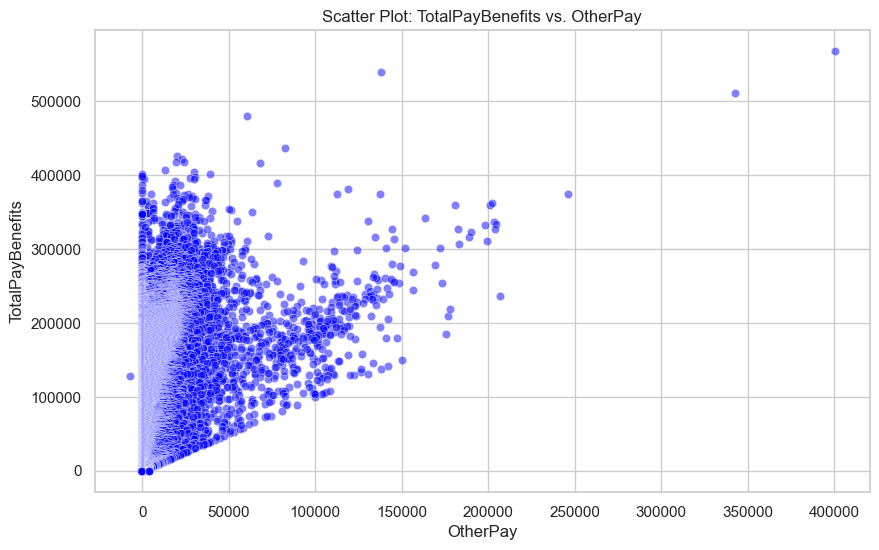

Correlation coefficient between TotalPayBenefits and Benefits: 0.7819630887982397


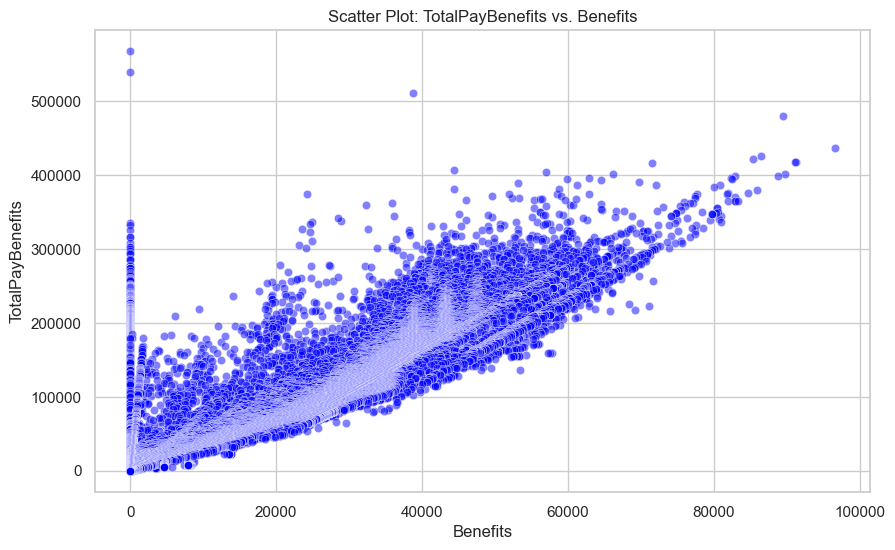

Correlation coefficient between TotalPayBenefits and TotalPay: 0.9773128522072111


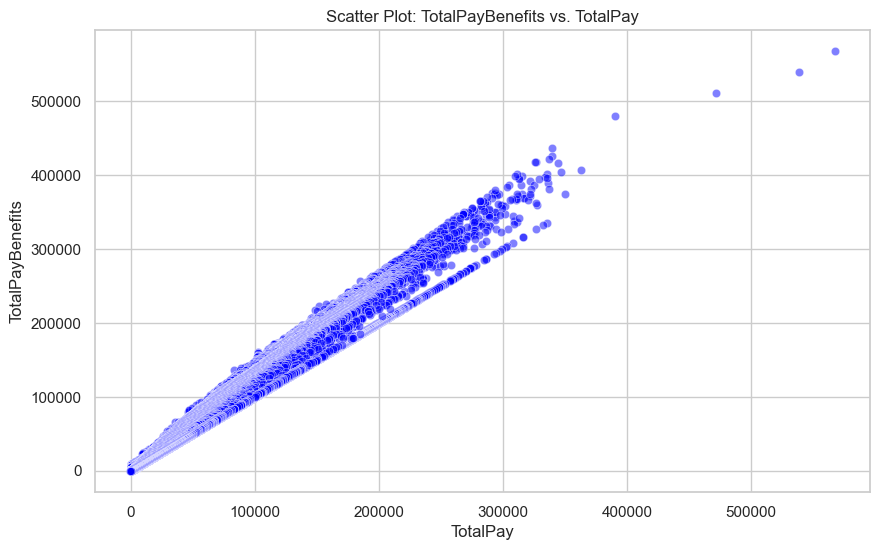

In [15]:
# Specify the salary column for analysis
salary_column = 'TotalPayBenefits'

# Specify the numerical column names excluding 'Id', 'Year', and the salary column
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay']

# Iterate through numerical columns and calculate correlation coefficients
for numerical_column in numerical_columns:
    correlation_coefficient = df[salary_column].corr(df[numerical_column])
    print(f"Correlation coefficient between {salary_column} and {numerical_column}: {correlation_coefficient}")

    # Plot scatter plots for visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=numerical_column, y=salary_column, data=df, alpha=0.5, color='blue')
    plt.title(f'Scatter Plot: {salary_column} vs. {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel(salary_column)
    plt.show()